**Objective**

- Automatically reads and analyse structured data (Excel,CSV) and unstructred data (PDF,TXT)
-Perform advanced bussiness analytics (trends,revenue_breakdown of products,products insights)
-Use NLP to extract sentimants and summary
-Building an agent that can answer real questions and business performance
-Visualize insights in charts & Summaries

In [ ]:
pip install PyPDF2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 3.6 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime
import PyPDF2
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from pathlib import Path


In [ ]:
df=pd.read_excel('sales_transactions_2022_2024.xlsx')

In [ ]:
df.head()

,Date,Product,Region,Units Sold,Unit Price,Revenue
0,2024-05-10,Tablet,East,66,12001,792066
1,2024-12-31,Accessory,North,59,97422,5747898
2,2024-11-10,Tablet,East,28,12948,362544
3,2022-05-02,Tablet,West,24,89391,2145384
4,2023-04-12,Laptop,South,51,30295,1545045


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        12000 non-null  datetime64[ns]
 1   Product     12000 non-null  object        
 2   Region      12000 non-null  object        
 3   Units Sold  12000 non-null  int64         
 4   Unit Price  12000 non-null  int64         
 5   Revenue     12000 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 562.6+ KB


In [ ]:
df.isnull().sum()

,0
Date,0
Product,0
Region,0
Units Sold,0
Unit Price,0
Revenue,0


In [ ]:
#Sales Transaction
df['Date']=pd.to_datetime(df['Date'])
df['Month']=df['Date'].dt.to_period('M')

In [ ]:
df.head()

,Date,Product,Region,Units Sold,Unit Price,Revenue,Month
0,2024-05-10,Tablet,East,66,12001,792066,2024-05
1,2024-12-31,Accessory,North,59,97422,5747898,2024-12
2,2024-11-10,Tablet,East,28,12948,362544,2024-11
3,2022-05-02,Tablet,West,24,89391,2145384,2022-05
4,2023-04-12,Laptop,South,51,30295,1545045,2023-04


In [ ]:
# Revenue Trend over time

monthly_revenue=df.groupby('Month')['Revenue'].sum().reset_index()

In [ ]:
monthly_revenue['Month']=monthly_revenue['Month'].dt.to_timestamp()

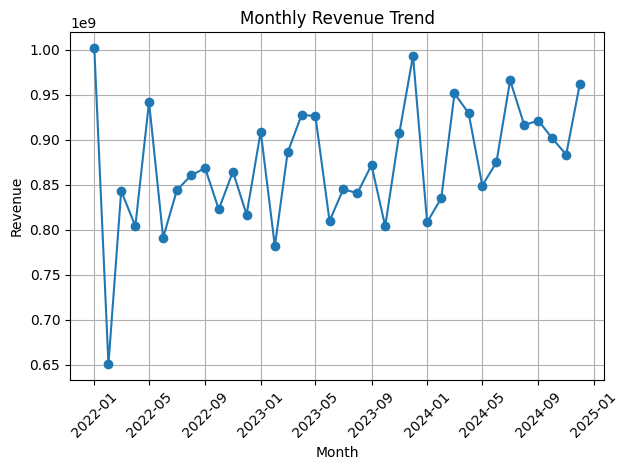

In [ ]:
plt.plot(monthly_revenue['Month'],monthly_revenue['Revenue'],marker='o')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.title('Monthly Revenue Trend')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()

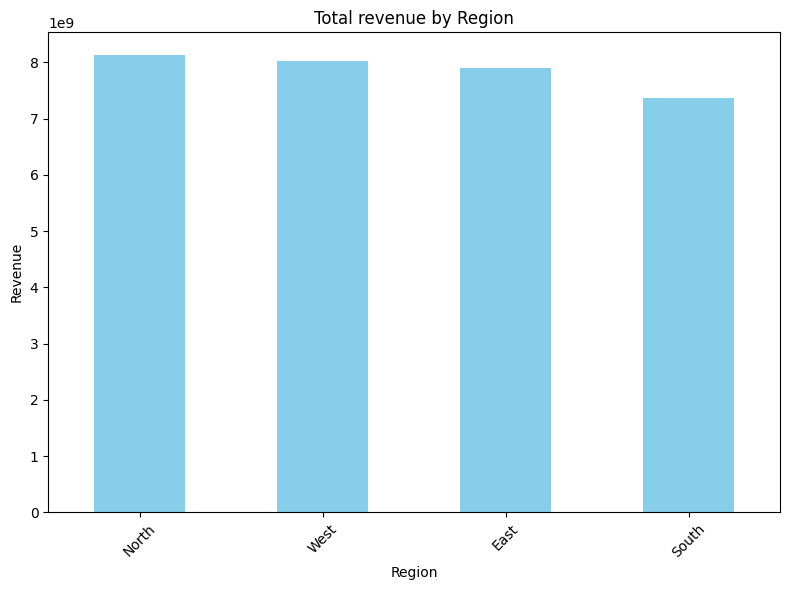

In [ ]:
#Region wise Revenue Contribution

region_rev=df.groupby('Region')['Revenue'].sum().sort_values(ascending=False)
plt.figure(figsize=(8,6))
region_rev.plot(kind='bar',color='skyblue')
plt.title('Total revenue by Region')
plt.xlabel('Region')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
feedback_df=pd.read_csv('customer_feedback_large.csv')

In [ ]:
feedback_df.head()

,CustomerID,Feedback,SentimentScore
0,1,Unresponsive helpline,0.88
1,2,Worst delivery experience,0.25
2,3,Delay in shipment,0.91
3,4,Great support,0.35
4,5,Unresponsive helpline,0.20


In [ ]:
def get_sentiment(text):
    score=sia.polarity_scores(text)['compound']
    return 'Positive' if score> 0.3 else 'Negative' if score< -0.3 else 'Neutral'

In [ ]:
sia = SentimentIntensityAnalyzer()
feedback_df['Sentiment'] = feedback_df['Feedback'].apply(get_sentiment)
display(feedback_df.head())

,CustomerID,Feedback,SentimentScore,Sentiment
0,1,Unresponsive helpline,0.88,Neutral
1,2,Worst delivery experience,0.25,Negative
2,3,Delay in shipment,0.91,Negative
3,4,Great support,0.35,Positive
4,5,Unresponsive helpline,0.20,Neutral


In [ ]:
sentiment_summary=feedback_df['Sentiment'].value_counts()

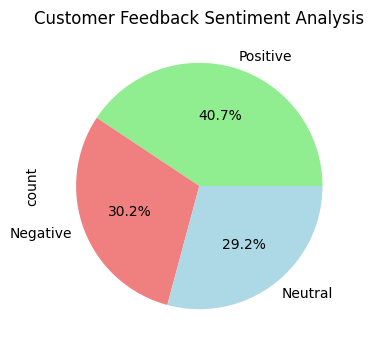

In [ ]:
plt.figure(figsize=(6,4))
sentiment_summary.plot(kind='pie',autopct='%1.1f%%',colors=['lightgreen','lightcoral','lightblue'])
plt.title('Customer Feedback Sentiment Analysis')
plt.show()

In [ ]:
# Adv Analytics - Product,Region and Time trends

top_products_by_region=df.groupby(['Region','Product'])['Revenue'].sum().reset_index()
top_in_each_region=top_products_by_region.sort_values(by='Revenue',ascending=False).groupby('Region').first().reset_index()

In [ ]:
top_in_each_region

,Region,Product,Revenue
0,East,Smartphone,1207128358
1,North,Smartphone,1273509925
2,South,Laptop,1145406065
3,West,Monitor,1242295044


In [ ]:
# Quaterly Sales

df['Quarter']=df['Date'].dt.to_period('Q')
quarterly_trend=df.groupby(['Quarter','Region'])['Revenue'].sum().unstack().fillna(0)

In [ ]:
quarterly_trend

Region,East,North,South,West
Quarter,,,,
2022Q1,652436461,558009408,569287220,715575095
2022Q2,733940761,555662045,581597129,666089239
2022Q3,555254688,726011312,659710925,631921901
2022Q4,609566545,662932441,652619101,578970511
2023Q1,630489102,628925586,602567287,714909610
2023Q2,654388978,695803369,629602414,684154814
2023Q3,641743018,748054524,577330881,590636741
2023Q4,718947201,778550511,586430353,620834034
2024Q1,581991236,686899854,633651433,692460726


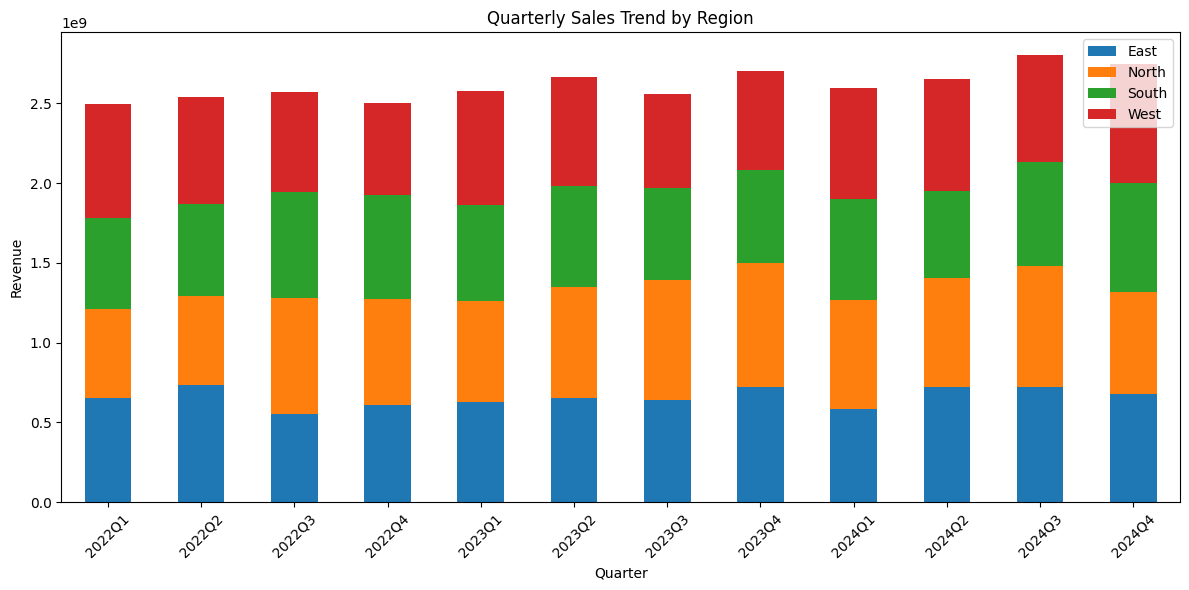

In [ ]:
quarterly_trend.plot(kind='bar',stacked=True,figsize=(12,6))
plt.title('Quarterly Sales Trend by Region')
plt.xlabel('Quarter')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend()
plt.show()

In [ ]:
def respond_to_query(query):
  if 'top product' in query.lower():
    top_product=df.groupby('Product')['Revenue'].sum().idxmax()
    return f'The top performing product overall is {top_product}'
  elif 'south' in query.lower() and 'q2' in query.lower():
    q2_data =df[(df['Region']=='South')&(df['Date'].dt.quarter==2)]
    q2_monthly=q2_data.groupby(q2_data['Date'].dt.to_period('H'))['Revenue'].sum()
    return q2_monthly
  else:
    return "Sorry i cannot answer the othe queries for now."

In [ ]:
respond_to_query('what is the top product')

'The top performing product overall is Smartphone'

----

In [ ]:
with open('market_trends_extended.txt','r') as f:
  market_text=f.read()
  print(market_text)


Market Analysis Report (2022–2024):

- 2022 Q1: High consumer demand post-pandemic recovery. E-commerce up by 18%.
- 2022 Q2: Inflation impact visible in rural markets. Cost-saving behavior observed.
- 2022 Q3: Festival season drove sales up 25%. Smartphones led growth.
- 2022 Q4: Regulatory changes in import duties impacted pricing.

- 2023 Q1: Supply chain issues normalized. Sales stabilized.
- 2023 Q2: Competitive pricing strategies led to margin pressure.
- 2023 Q3: New launches in premium category. Tablets showed surprising growth.
- 2023 Q4: High return rate observed in accessories.

- 2024 Q1: Budget revisions and new GST rules impacted procurement timelines.
- 2024 Q2: International demand increases. Export orders surged.



In [ ]:
# PDF data

reader=PyPDF2.PdfReader('board_meeting_summary_long.pdf')
pdf_text=''
for page in reader.pages:
  pdf_text+=page.extract_text()

print(pdf_text)

Board Meeting Summary - FY 2022 to 2024
- Q1 2022: Regional expansion in East India.
- Q3 2022: Mobile sales contributed 35% of revenue.
- Q4 2022: CRM system implemented company-wide.
- Q1 2023: Recruitment drive for tech support.
- Q2 2023: Launch of customer loyalty program.
- Q4 2023: New B2B channel opened in Pune and Delhi.
- Q1 2024: Customer churn increased due to late deliveries.
- Q2 2024: Major logistics contract signed with ShipX.
Action Items:
- Develop AI chatbot for support queries.
- Reduce delivery time by 20% in metro regions.
- Add multilingual options in mobile app.


---
building prompts using openAI

In [ ]:
import openai

In [ ]:
top_product=df.groupby('Product')['Revenue'].sum().sort_values(ascending=False).head(5)
region_pref=df.groupby('Region')['Revenue'].sum()
product_units=df.groupby('Product')['Units Sold'].sum().sort_values(ascending=False)
feedback_summary=feedback_df['Feedback'].value_counts().head()

In [ ]:
from google.colab import userdata
api_key=userdata.get('OPEN_API_KEY')

In [ ]:
from openai import OpenAI
client=OpenAI(api_key=api_key)

def ask_ai_agent(query):
  prompt=f"""You are a highly skilled business analyst AI Assistant
            Here is the business context to use in your answer.

            Top Product by Revenue:
            {top_product.to_string()}

            Product Units Sold Per Product:
            {product_units.to_string()}

            Revenue By Region:
            {region_pref.to_string()}

            Market Trend Highlights:
            {market_text[:100]}

            Board Meeting Summary:
            {pdf_text[:100]}

            Feedback Summary of the Customers:
            {feedback_summary.to_string()}

            Now analyze and answer te query:   """+query

  response=client.chat.completions.create(
      model='gpt-3.5-turbo',
      messages= [{'role':'user','content':prompt}]
  )
  return response.choices[0].message.content


In [ ]:
print(ask_ai_agent('what is the selling product for 2023'))
print(ask_ai_agent('what is the total revenue by region'))

Based on the information provided, the top-selling product for 2023 can be determined by analyzing the product units sold per product and the revenue generated by each product.

From the data:
- Accessory had the highest units sold at 89,577.
- Smartphone had the highest revenue at 4,681,980,377.

Combining this information, the selling product for 2023 can be identified as the Accessory, as it had the highest number of units sold, indicating strong consumer demand. While the Smartphone generated the highest revenue, the number of units sold for the Accessory suggests it was the more popular choice among customers in 2023. 

Therefore, the Accessory is likely the top-selling product for 2023.
To calculate the total revenue by region, we need to sum up the revenue generated in each region. 

Total Revenue by Region:
- East: $7,893,257,474
- North: $8,128,612,830
- South: $7,374,011,628
- West: $8,017,876,797

Therefore, the total revenue by region is:
East: $7,893,257,474
North: $8,128,